In [1]:
import sys
sys.path.append("../Scripts/")
import preprocess
import datasets

In [2]:
dataset_dir = "../Data/Train/" # define the folder names for train dataset 
train_label_file = "../Data/train_data.csv"

In [4]:
from datasets import ColorImageDataset
from sklearn.model_selection import train_test_split
import pandas as pd

train_data = pd.read_csv(train_label_file)
train_df, valid_df = train_test_split(train_data, test_size=0.2, random_state=42)   # split the train set into train and validation datasets

train_dataset = ColorImageDataset(img_labels=train_df, dataset_dir=dataset_dir) # using torch dataset to wrap the datasets 
valid_dataset = ColorImageDataset(img_labels=valid_df, dataset_dir=dataset_dir) # and generate feature vectors



In [7]:
train_list_data = [data.tolist() for data, _ in train_dataset]
train_list_label = [label for _, label in train_dataset]


train_df = pd.DataFrame(train_list_data) # converting datasets to dataframe format as it is the input for sklearn classifiers 
train_label_df = pd.DataFrame(train_list_label, columns=["Labels"])

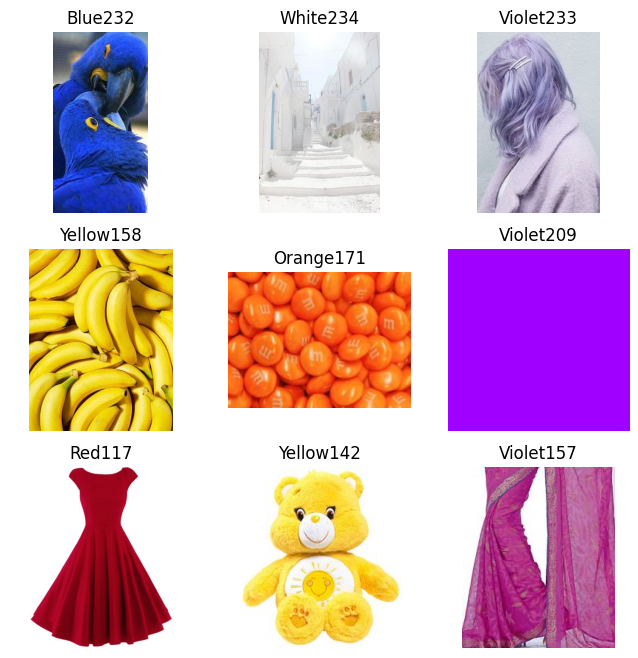

In [10]:
import matplotlib.pyplot as plt 
import torch 
import cv2 as cv
import os

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    label = train_dataset.img_labels.iloc[sample_idx, 1]
    img_path = os.path.join(dataset_dir, train_dataset.img_labels.iloc[sample_idx, 0])
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [8]:
valid_list_data = [data.tolist() for data, _ in valid_dataset]
valid_list_label = [label for _, label in valid_dataset]


valid_df = pd.DataFrame(valid_list_data) # converting datasets to dataframe format as it is the input for sklearn classifiers 
valid_label_df = pd.DataFrame(valid_list_label, columns=["Labels"])

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # import metrics to compute accuracy

C_list = [1, 10, 50, 100]
kernel_list = ['linear', 'rbf', 'poly']

for c_value in C_list:
    for kernel_type in kernel_list:
        svc=SVC(kernel=kernel_type, C=c_value) # instantiate classifier with default hyperparameters

        # fit classifier to training set
        svc.fit(train_df,train_label_df["Labels"])
        y_pred=svc.predict(valid_df)
        # compute and print accuracy score
        print(f'C = {c_value} kernel = {kernel_type} Accuracy = {accuracy_score(valid_label_df, y_pred):.4f}')


C = 1 kernel = linear Accuracy = 0.6406
C = 1 kernel = rbf Accuracy = 0.6250
C = 1 kernel = poly Accuracy = 0.6250
C = 10 kernel = linear Accuracy = 0.6406
C = 10 kernel = rbf Accuracy = 0.6406
C = 10 kernel = poly Accuracy = 0.6094
C = 50 kernel = linear Accuracy = 0.5312
C = 50 kernel = rbf Accuracy = 0.5781
C = 50 kernel = poly Accuracy = 0.5469
C = 100 kernel = linear Accuracy = 0.5156
C = 100 kernel = rbf Accuracy = 0.5781
C = 100 kernel = poly Accuracy = 0.5000


In [3]:
import pickle
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # import metrics to compute accuracy

dataset_dir = "../Data/Train/" # define the folder names for train dataset 
train_label_file = "../Data/train_data.csv"
train_data = pd.read_csv(train_label_file)

train_dataset = ColorImageDataset(img_labels=train_data, dataset_dir=dataset_dir) # Whole train set after validation
train_list_data = [data.tolist() for data, _ in train_dataset]
train_list_label = [label for _, label in train_dataset]


train_df = pd.DataFrame(train_list_data) # converting datasets to dataframe format as it is the input for sklearn classifiers 
train_label_df = pd.DataFrame(train_list_label, columns=["Labels"])

# Hyperparameters selected from the validation process
C = 10
kernel = 'linear'
svc=SVC(kernel=kernel, C=C) # instantiate classifier with default hyperparameters

# fit classifier to training set
svc.fit(train_df,train_label_df["Labels"])

# save the final classifier
pickle.dump(svc, open("../Models/model_final_svm.p","wb"))


